<a href="https://colab.research.google.com/github/NireAstro/1221-dark-matter/blob/main/1221_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello World!')

Hello World!


In [ ]:
import numpy as np # import another module to deal with numbers

In [ ]:
print(np.sqrt(16))

4.0


In [ ]:
import matplotlib.pyplot as plt # import plotting module as plt

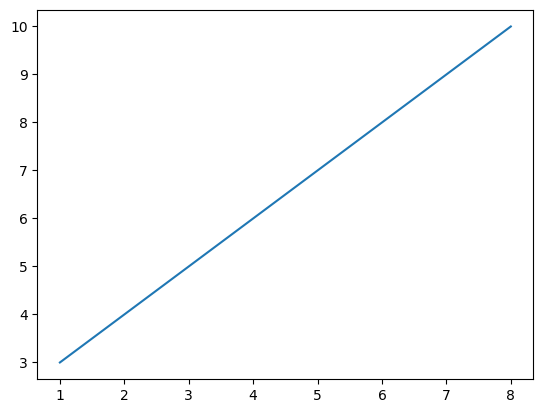

In [ ]:
xpoints = np.array([1,8]) # an array is a group of numbers, create an array with two numbers 1 and 8,
                          # and store the array with the name points
ypoints = np.array ([3, 10]) # create an array with the numbers 3 and 10,
                             # and store the array with the name ypoints

plt.plot(xpoints, ypoints) # plot xpoints on the x-axis and ypoints on the y-axis,
                           # (linestyle lets you choose how the line is presented on the plot, dotted or if it appears at all)
                           # (marker allows you to change the endpoints of the line, for e.g., have the line start and end with dots)
plt.show()

In [ ]:
# Orbital velocity: Sun-Earth System

In [ ]:
import astropy.units as u
import astropy.constants as ac

$v_{orbital} = \sqrt\frac{GM_\odot}{r}$

In [ ]:
ac.G.si

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [ ]:
v_orbital = np.sqrt(ac.G * u.solMass / u.au)

In [ ]:
print(v_orbital.si, v_orbital.to(u.km / u.s), v_orbital.to(ac.c))

29784.691829676933 m / s 29.784691829676934 km / s 9.935103780921979e-05 2.99792e+08 m / s


In [ ]:
# Earth-Satellite System

In [ ]:
v_satellite = np.sqrt(ac.G * u.earthMass / u.earthRad)

In [ ]:
print(v_satellite.to(u.km / u.s))

7.905388234385281 km / s


In [ ]:
# Black Hole - Photon System

In [ ]:
r_schwachild = ac.G * u.solMass / ac.c**2
print(r_schwachild.to(u.km))

1.476625038050125 km


In [ ]:
# Class Demo

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii # Helps to read in files

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") # Reading in the file using the program above.

In [ ]:
tab # showing the data within the file.

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


Text(0, 0.5, 'Velocity[km/s]')

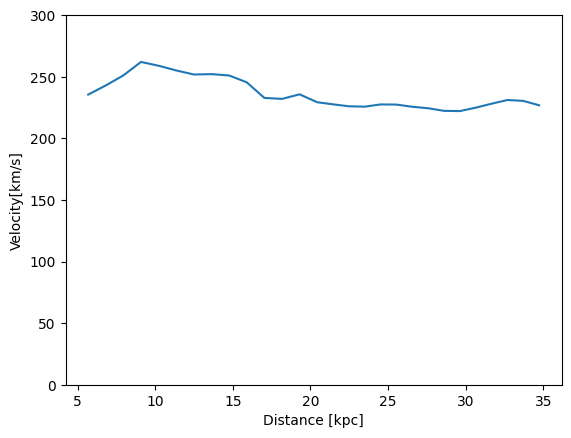

In [ ]:
dis = tab["col2"] # putting the data in the 2nd column under the "name" dis for distance.
vel = tab["col3"] # naming the 3rd column of the data vel for velocity.
plt.plot(dis, vel) # plotting dis as the x-value and vel as the y-value.

plt.ylim(0,300) # setting the limits of the y-axis.

plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # Labelling the y-axis.

In [ ]:
print(dis) # showing the data in the 2nd column that is under the name dis.

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [ ]:
def calculate_orbital_velocity(mass, radius): # creating a loop that will help us make this calculation multiple times.
  return(np.sqrt(ac.G * mass/ radius))

In [ ]:
mass = 1 * u.earthMass # giving the mass a number value according to the elements of the loop.
radius = 1 * u.earthRad # giving the radius a number value to be able to calculate the orbital velocity fo an object.
orb_vel = calculate_orbital_velocity(mass, radius) # putting the loop under a shorter to make the process more efficent.
print(orb_vel.to(u.km / u.s)) # showing the results of the calculation as well as converting the answer to km/s.

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass # giving mass a different value from the assumed mass of M13 black hole.
radius = 5.68 * 1000 * u.parsec # giving radius another value from the data file and converting it to kpc.
orb_vel = calculate_orbital_velocity(mass, radius)# putting the loop under a shorter to make the process more efficent.
print(orb_vel.to(u.km / u.s)) # showing the results of the calculation as well as converting the answer to km/s.

4.766142291386287 km / s


In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create velocty array to create same number of elements as the distance array.

for i, radius in enumerate(dis): # creating an array or loop that will allow us to calculate the orbital velocity with all of the data at once.
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  # print("The orbital velocity at", radius, "kpc =", orb_vel.to(u.km / u.s))

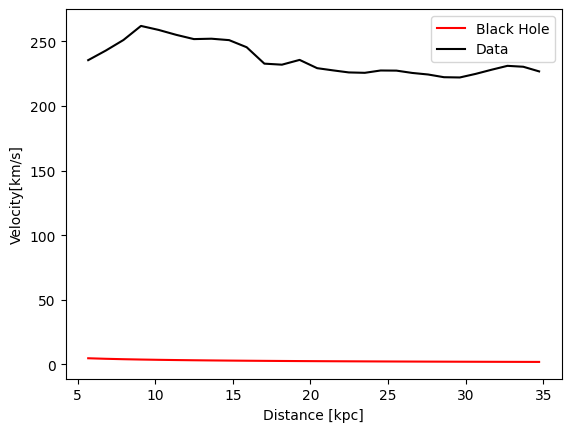

In [ ]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]
plt.plot(dis, vel_bh.value, color = "r", label = "Black Hole") # plotting the data for the black hole calculation and makingthe line red.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.
plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # labelling the y-axis.
plt.legend() # creating a key that shows which data is which.

In [ ]:
vel_bh[0] # showing the first result of the orbital velocity calculation from the data.

<Quantity 4.76614229 km / s>